In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer
import re


# Average number of posts per day (different from total number present in accounts file, we only have one year of data)

In [3]:
brands = ['athenaprocopiou', 'daftcollectionofficial', 'dodobaror', 'emporiosirenuse', 'heidikleinswim',
              'lisamariefernandez', 'loupcharmant', 'miguelinagambaccini', 'muzungusisters', 'zeusndione']

columns = ['username', 'id_post', 'likes_count', 'comment_count', 'taken_at_timestamp']
# reading posts data
posts_data = pd.DataFrame(columns=columns)
for brand in brands:
    posts_data = posts_data.append(pd.read_csv(
        'EMPORIOSIRENUSE_20173012/' + brand + '/followers data/' + brand + '_followers_posts.csv',
        usecols=columns))

# posts data cleaning
posts_data.drop_duplicates(subset='id_post', inplace=True)
posts_data[['likes_count', 'comment_count']] = posts_data[['likes_count', 'comment_count']].apply(pd.to_numeric)

C:\Users\moren\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\moren\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# aggregating posts data to get user features
posts_count = posts_data.groupby(['username']).count()['id_post'].to_frame().reset_index()
posts_count = posts_count.rename(index=str, columns={"id_post": "posts_count"})
posts_count['avg_posts_per_day'] = posts_count['posts_count']/365
print('Max: ' + str(max(posts_count['avg_posts_per_day'])))
posts_count.head()

Max: 42.7424657534


,username,posts_count,avg_posts_per_day
0,0,239,0.654795
1,00006_6,19,0.052055
2,0000gazei,2,0.005479
3,0000pag,8,0.021918
4,001111_18,15,0.041096


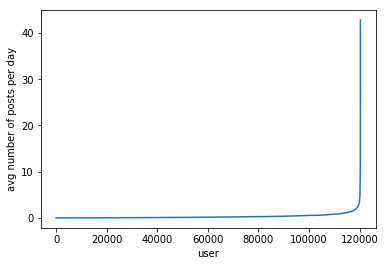

In [9]:
plt.figure()
plt.xlabel('user')
plt.ylabel('avg number of posts per day')
ys = np.sort(posts_count['avg_posts_per_day'].as_matrix())
plt.plot(ys)

This is plot represents the number of posts of each user in the last year, divided by 365. They are in increasing order.

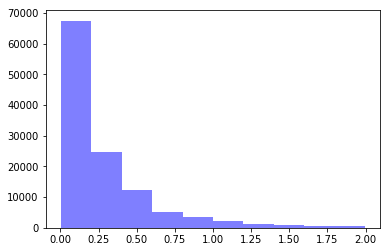

In [13]:
num_bins = 10
n, bins, patches = plt.hist(ys[np.where(ys<2)], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In this histogram you can see the number of users posting between 0 and 2 posts per day. More than 2 is pretty much irrelevant.

In [120]:
ys[-15:]

array([ 13.97260274,  13.97260274,  13.97260274,  15.61643836,
        15.64109589,  16.27671233,  16.91780822,  18.94520548,
        23.72328767,  23.83561644,  24.10136986,  25.24931507,
        27.24383562,  29.39726027,  42.74246575])

In [15]:
posts_count.iloc[np.where(posts_count['avg_posts_per_day'].as_matrix() > 15)]['username']

914       __trends__hunters__
21169        chaneldiorgucci1
21609             checkthetag
24930       cowboyleathershop
36295      fashion_dessert777
40572              gigitropea
59761        laqueen_official
61062         lediamantnoir_d
75606                 mimi9er
79401       mustafayilmaz4399
82251     niallhoran_blessed1
115850              vox_shoes
Name: username, dtype: object

# Total number of posts per hour

In [16]:
def gen_hour_from_timestamp(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).hour

In [17]:
posts_data['taken_at_timestamp'].head().apply(gen_hour_from_timestamp)

0    10
1     0
2    13
3    13
4    21
Name: taken_at_timestamp, dtype: int64

In [18]:
posting_hour = posts_data['taken_at_timestamp'].dropna()
posting_hour = posting_hour.apply(gen_hour_from_timestamp)
posting_hour = posting_hour.as_matrix()

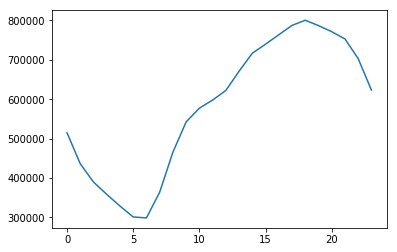

In [19]:
plt.figure()
unique, counts = np.unique(posting_hour, return_counts=True)
plt.plot(unique, counts)

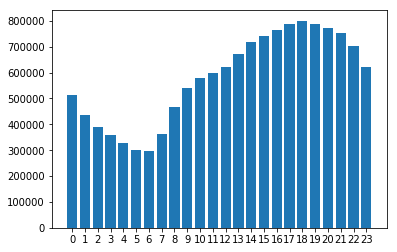

In [20]:
plt.bar(unique, counts)
plt.xticks(unique)
plt.show()

# Now let's repeat the same analisys for the 700 users in already classified

In [31]:
def gen_posts_counts(posts_data):
    posts_count = posts_data.groupby(['username']).count()['id_post'].to_frame().reset_index()
    posts_count = posts_count.rename(index=str, columns={"id_post": "posts_count"})
    posts_count['avg_posts_per_day'] = posts_count['posts_count']/365
    print('Max: ' + str(max(posts_count['avg_posts_per_day'])))
    return posts_count

def gen_posting_hour(posts_data):
    posting_hour = posts_data['taken_at_timestamp'].dropna()
    posting_hour = posting_hour.apply(gen_hour_from_timestamp)
    posting_hour = posting_hour.as_matrix()
    return posting_hour

In [32]:
labels_data = pd.read_csv('followers_classification/data/700 profiles for claissifier - second round.csv',
                              delimiter=',',
                              usecols=['username', 'consumer', 'retailer', 'others'])
labels_data.head()

,username,consumer,retailer,others
0,nixhus,1,0,0
1,steph_davies,1,0,0
2,gloriavp,1,0,0
3,theajacinto,1,0,0
4,artbydevwoo,1,0,0


In [33]:
labels_posts_data = labels_data.merge(posts_data, on='username')
print(labels_posts_data.shape)
labels_posts_data.head()

(76378, 8)


,username,consumer,retailer,others,comment_count,id_post,likes_count,taken_at_timestamp
0,dies_martis,1,0,0,0.0,1635777297363641957,3.0,1.50922e+09
1,dies_martis,1,0,0,0.0,1618377373349067063,4.0,1.50715e+09
2,dies_martis,1,0,0,0.0,1618376636703549548,6.0,1.50715e+09
3,dies_martis,1,0,0,0.0,1617420557622602585,5.0,1.50703e+09
4,dies_martis,1,0,0,0.0,1604157593562033370,13.0,1.50545e+09


In [34]:
posts_count = gen_posts_counts(labels_posts_data)
posts_count.head()

Max: 9.33698630137


,username,posts_count,avg_posts_per_day
0,25park,1924,5.271233
1,4u2by,29,0.079452
2,__p___w__,441,1.208219
3,_flat_earth_,4,0.010959
4,_louislesouefandco_,200,0.547945


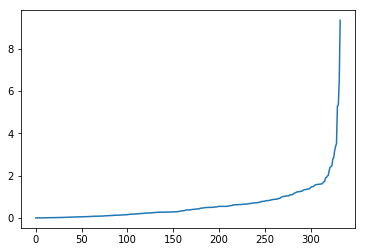

In [37]:
plt.figure()
ys = np.sort(posts_count['avg_posts_per_day'].as_matrix())
plt.plot(ys)

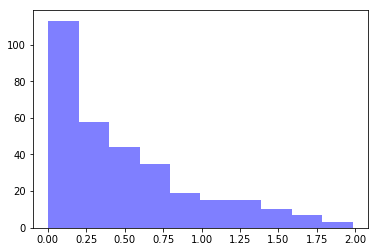

In [39]:
num_bins = 10
n, bins, patches = plt.hist(ys[np.where(ys<2)], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In this histogram you can see the number of classified users posting between 0 and 5 posts per day. More than 5 is pretty much irrelevant.

In [40]:
posting_hour = gen_posting_hour(labels_posts_data)

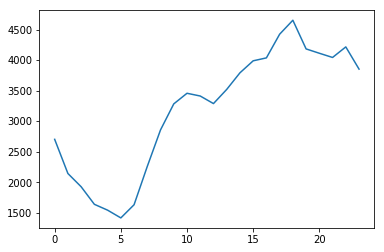

In [41]:
plt.figure()
posting_hour = np.sort(posting_hour)
unique, counts = np.unique(posting_hour, return_counts=True)
plt.plot(unique, counts)

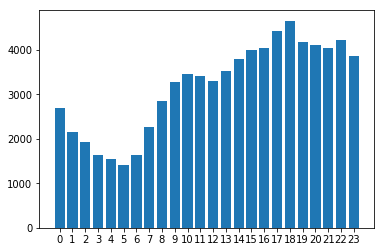

In [42]:
plt.bar(unique, counts)
plt.xticks(unique)
plt.show()

Pretty similar behaviour, let's see if we can distinguish between the various classes

# Let's perform the same analisys on consumers

In [43]:
consumers_posts_data = labels_data.query('consumer == 1').merge(posts_data, on='username')
print(consumers_posts_data.shape)
consumers_posts_data.head()

(36924, 8)


,username,consumer,retailer,others,comment_count,id_post,likes_count,taken_at_timestamp
0,dies_martis,1,0,0,0.0,1635777297363641957,3.0,1.50922e+09
1,dies_martis,1,0,0,0.0,1618377373349067063,4.0,1.50715e+09
2,dies_martis,1,0,0,0.0,1618376636703549548,6.0,1.50715e+09
3,dies_martis,1,0,0,0.0,1617420557622602585,5.0,1.50703e+09
4,dies_martis,1,0,0,0.0,1604157593562033370,13.0,1.50545e+09


In [45]:
posts_count = gen_posts_counts(consumers_posts_data)
posts_count.head()

Max: 5.33698630137


,username,posts_count,avg_posts_per_day
0,__p___w__,441,1.208219
1,_flat_earth_,4,0.010959
2,abelle1010,2,0.005479
3,adva35,103,0.282192
4,agnem__,36,0.098630


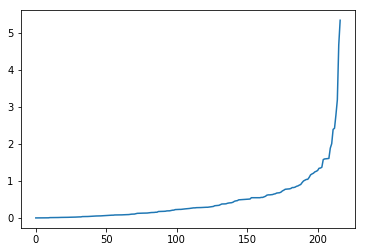

In [46]:
plt.figure()
ys = np.sort(posts_count['avg_posts_per_day'].as_matrix())
plt.plot(ys)

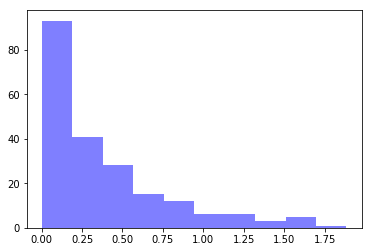

In [47]:
num_bins = 10
n, bins, patches = plt.hist(ys[np.where(ys<2)], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In this histogram you can see the number of **consumers** posting between 0 and 2 posts per day. More than 2 is pretty much irrelevant.

In [48]:
posting_hour = gen_posting_hour(consumers_posts_data)

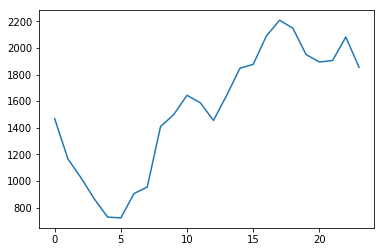

In [49]:
plt.figure()
posting_hour = np.sort(posting_hour)
unique, counts = np.unique(posting_hour, return_counts=True)
plt.plot(unique, counts)

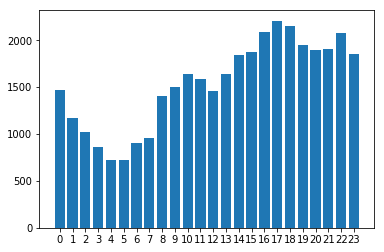

In [50]:
plt.bar(unique, counts)
plt.xticks(unique)
plt.show()

Again pretty similar behaviour, let's do retailers and others

# Retailers and others

In [51]:
others_posts_data = labels_data.query('retailer == 1 or others == 1').merge(posts_data, on='username')
print(others_posts_data.shape)
others_posts_data.head()

(39454, 8)


,username,consumer,retailer,others,comment_count,id_post,likes_count,taken_at_timestamp
0,kenzaeyz,0,0,1,2.0,1641648220171943738,83.0,1509919739
1,kenzaeyz,0,0,1,0.0,1641634314024130306,73.0,1509918081
2,kenzaeyz,0,0,1,5.0,1639431058447466228,111.0,1509655501
3,kenzaeyz,0,0,1,5.0,1638406732034141588,96.0,1509533324
4,kenzaeyz,0,0,1,9.0,1637877093301824855,176.0,1509470186


#### Interestingly enough, even though we have just around 150 users in "others" and "retailer", they have more posts than the consumers, maybe the number of posts is a pretty relevant feature

In [52]:
posts_count = gen_posts_counts(others_posts_data)
posts_count.head()

Max: 6.45205479452


,username,posts_count,avg_posts_per_day
0,25park,1924,5.271233
1,4u2by,29,0.079452
2,_louislesouefandco_,200,0.547945
3,_luluyesyes_,539,1.476712
4,abbeyclancyofficial,100,0.273973


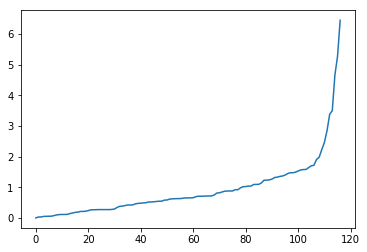

In [53]:
plt.figure()
ys = np.sort(posts_count['avg_posts_per_day'].as_matrix())
plt.plot(ys)

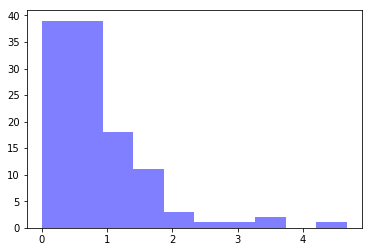

In [55]:
num_bins = 10
n, bins, patches = plt.hist(ys[np.where(ys<5)], num_bins, facecolor='blue', alpha=0.5)
plt.show()

It looks like retailers and others tend to post more often than consumers! The scale of this histogram is different than before, the others had a maximum of 2 posts per day on the x axis, here 5 was chosen to better represent the distribution.

In [56]:
posting_hour = gen_posting_hour(consumers_posts_data)

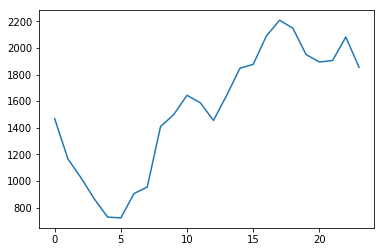

In [57]:
plt.figure()
unique, counts = np.unique(posting_hour, return_counts=True)
plt.plot(unique, counts)

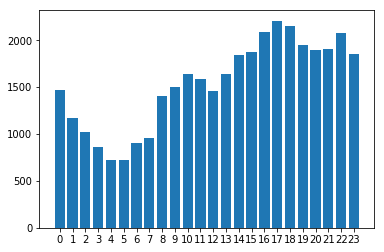

In [58]:
plt.bar(unique, counts)
plt.xticks(unique)
plt.show()

# Just retailers

In [60]:
retailers_posts_data = labels_data.query('retailer == 1').merge(posts_data, on='username')
print(retailers_posts_data.shape)
retailers_posts_data.head()

(8011, 8)


,username,consumer,retailer,others,comment_count,id_post,likes_count,taken_at_timestamp
0,tamarlandau_tml,0,1,0,1.0,1644802635617603488,26.0,1510295775
1,tamarlandau_tml,0,1,0,1.0,1644030760293638140,35.0,1510203760
2,tamarlandau_tml,0,1,0,0.0,1643345719183902785,29.0,1510122097
3,tamarlandau_tml,0,1,0,7.0,1642588797325300378,59.0,1510031865
4,tamarlandau_tml,0,1,0,2.0,1641852923281312928,33.0,1509944142


In [61]:
# aggregating posts data to get user features
posts_count = gen_posts_counts(retailers_posts_data)
posts_count.head()

Max: 6.45205479452


,username,posts_count,avg_posts_per_day
0,aranaz_dxb,260,0.712329
1,cabanashow,97,0.265753
2,claretshowroom,572,1.567123
3,ekaterinipietri,182,0.498630
4,fashionbank_online,310,0.849315


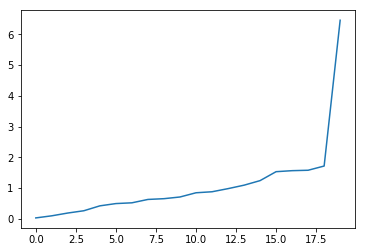

In [62]:
plt.figure()
ys = np.sort(posts_count['avg_posts_per_day'].as_matrix())
plt.plot(ys)

In [63]:
posting_hour = gen_posting_hour(retailers_posts_data)

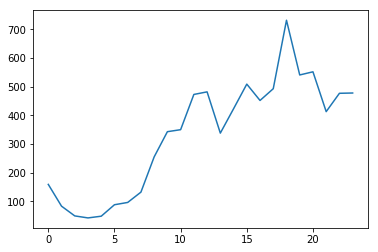

In [64]:
plt.figure()
unique, counts = np.unique(posting_hour, return_counts=True)
plt.plot(unique, counts)

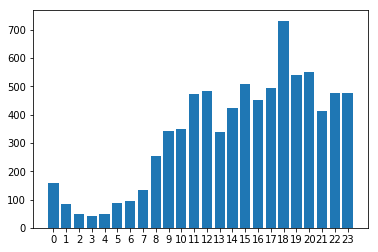

In [65]:
plt.bar(unique, counts)
plt.xticks(unique)
plt.show()

# Lets look for a common language in the bios of retailers and others

In [66]:
def clean_bios(bio):
    bio = bio.replace('b\'', '')
    bio = bio.replace('\\n', '')
    bio = bio.replace('\\r', '')
    bio = bio.replace('\\\\x', '<')
    #this last one removes emojis
    bio = re.sub('<\w\w', '', bio)
    return bio

In [67]:
names = ['user_id', 'username', 'profile_pic', 'followers_count', 'following_count',
        'num_posts', 'bio', 'isPrivate']
cols = ['username', 'bio']
followers_data = pd.read_csv('followers_classification/data/users.csv', delimiter=',', names=names, usecols=cols)
followers_data['bio'] = followers_data['bio'].fillna('bio')
followers_data['bio'] = followers_data['bio'].apply(clean_bios)

In [69]:
others_account_data = labels_data.query('retailer == 1 or others == 1').merge(followers_data, on='username')
others_account_data.head()

,username,consumer,retailer,others,bio
0,kenzaeyz,0,0,1,International Communications & Marketing\P.R. ...
1,aleorland,0,0,1,alejandra.amoros@gmail.com'
2,thegreedysprout,0,0,1,plants \ all animals \Vegan baking blogger \J...
3,thelouloves,0,0,1,Brit Blogger 32\ Sydney | AUS\ asklouloves@...
4,thewearnecessities,0,0,1,My online scrapbook of all things fashion!! Fo...


In [70]:
vectorizer = CountVectorizer(min_df=3, stop_words=['and', 'or', 'before', 'a', 'an', 'the', 'bio', 'is', 'all', 'to', 'for', 'by', 'in', 'of', 'we', 'our', 'at'])
x = vectorizer.fit_transform(others_account_data['bio'])
reverse_voc = {y:x for x,y in vectorizer.vocabulary_.items()}
x.shape

(146, 89)

In [71]:
counts = np.squeeze(np.asarray(x.sum(axis=0)))
sorted_idx = np.flip(np.argsort(counts), axis=0)
names = [reverse_voc[idx] for idx in sorted_idx]
names

['com',
 'fashion',
 'shop',
 'new',
 'de',
 'gmail',
 'info',
 'with',
 'brand',
 'shipping',
 'jewelry',
 'worldwide',
 'online',
 'us',
 'world',
 'from',
 'la',
 'york',
 'inspired',
 'luxury',
 'handmade',
 'design',
 'best',
 'beautiful',
 'on',
 'global',
 'email',
 'beauty',
 'london',
 'modern',
 'accessories',
 'official',
 'your',
 'store',
 'www',
 'women',
 'style',
 'out',
 'spain',
 'jewellery',
 'based',
 'what',
 'boutique',
 'city',
 'via',
 'designers',
 'that',
 'st',
 'http',
 'only',
 'lover',
 'now',
 'no',
 'lifestyle',
 'madrid',
 'love',
 'pr',
 'quality',
 'my',
 'blog',
 'clothing',
 'me',
 'vogue',
 'bohemian',
 'sales',
 'contact',
 'wholesale',
 'pieces',
 'art',
 'agency',
 'account',
 'magazine',
 'things',
 'curated',
 'unique',
 'kids',
 'designer',
 'dm',
 'made',
 'swimwear',
 'swim',
 'handcrafted',
 'retail',
 'insider',
 'sisters',
 'it',
 'label',
 'shoes',
 '16']

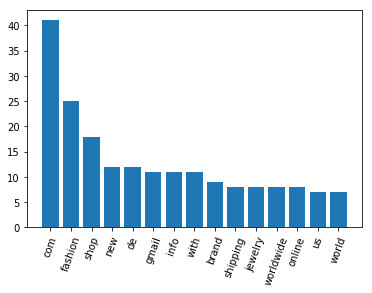

In [72]:
ind = range(15)
plt.bar(ind, counts[sorted_idx[:15]])
plt.xticks(rotation=70)
plt.xticks(ind, names[:15])
plt.show()

These are the most used words in the bios of retailers and others. Let's now see how different it is wrt consumers ones

In [73]:
consumers_account_data = labels_data.query('consumer == 1').merge(followers_data, on='username')
consumers_account_data.head()

,username,consumer,retailer,others,bio
0,nixhus,1,0,0,bio
1,steph_davies,1,0,0,Liverpool | 23'
2,gloriavp,1,0,0,"Fashion Designer who loves lifestyle, homedeco..."
3,theajacinto,1,0,0,the official Andy and Alfie fan page'
4,artbydevwoo,1,0,0,bio


In [74]:
vectorizer = CountVectorizer(min_df=3, stop_words=['and', 'or', 'before', 'a', 'an', 'the', 'bio', 'is', 'all', 'to', 'for', 'by', 'in', 'of', 'we', 'our', 'at', 'my', 'be'])
x = vectorizer.fit_transform(consumers_account_data['bio'])
reverse_voc = {y:x for x,y in vectorizer.vocabulary_.items()}

In [75]:
counts = np.squeeze(np.asarray(x.sum(axis=0)))
sorted_idx = np.flip(np.argsort(np.squeeze(np.asarray(x.sum(axis=0)))), axis=0)
names = [reverse_voc[idx] for idx in sorted_idx]
names

['fashion',
 'com',
 'life',
 'designer',
 'director',
 'love',
 'london',
 'me',
 'creative',
 'founder',
 'gmail',
 'with',
 'lover',
 'stylist',
 'travel',
 'you',
 'de',
 'follow',
 'family',
 'it',
 'your',
 'food',
 'lifestyle',
 'interior',
 'from',
 'design',
 'make',
 'living',
 'time',
 'mother',
 'are',
 'art',
 'artist',
 'blog',
 'music',
 'co',
 'world',
 'good',
 'things',
 'style',
 'friends',
 'on',
 'twitter',
 'everything',
 'live',
 'have',
 'fun',
 'mum',
 'more',
 'mummy',
 'model',
 '16',
 'snapchat',
 'do',
 'consultant',
 'writer',
 'fitness',
 'buyer',
 'miami',
 'born',
 'nyc',
 'one',
 'may',
 'new',
 'photos',
 'll',
 'always',
 'la',
 'athens',
 'pictures',
 'manager',
 'no',
 '22',
 'adventures',
 'now',
 'not',
 'coffee',
 'best',
 'ceo',
 'bitch',
 'brand',
 'based',
 'beauty',
 'blogger',
 'visual',
 'wife',
 'mama',
 'vintage',
 'info',
 'magazine',
 'made',
 'loving',
 'own',
 'paris',
 'personal',
 'real',
 'less',
 'shop',
 'instagram',
 'hotmail',

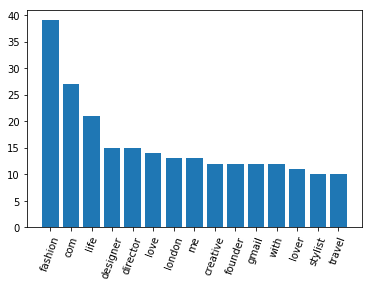

In [76]:
ind = range(15)
plt.bar(ind, counts[sorted_idx[:15]])
plt.xticks(rotation=70)
plt.xticks(ind, names[:15])
plt.show()

It looks fairly different, I'll try to use the numeber of words in these two vocabularies as a feature, let's see what comes out